## Libraries Importing

In [3]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00601/ai4i2020.csv")


In [6]:
data.sample(15)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
251,252,M15111,M,298.0,308.2,1466,42.6,2,0,0,0,0,0,0
8141,8142,L55321,L,299.6,310.8,1393,49.9,78,0,0,0,0,0,0
868,869,M15728,M,295.8,306.5,1514,37.7,60,0,0,0,0,0,0
859,860,H30273,H,296.2,307.0,1542,40.6,28,0,0,0,0,0,0
7286,7287,M22146,M,300.1,310.4,1480,37.1,77,0,0,0,0,0,0
1173,1174,H30587,H,297.1,308.0,1559,38.8,229,0,0,0,0,0,0
4558,4559,L51738,L,302.7,310.7,1369,47.5,11,1,0,1,0,0,0
1209,1210,H30623,H,297.0,308.1,2540,13.3,98,0,0,0,0,0,0
1379,1380,L48559,L,298.7,310.1,1620,34.8,112,0,0,0,0,0,0
4144,4145,L51324,L,301.8,310.1,1738,28.0,58,0,0,0,0,0,0


In [15]:
print('Missing values in the dataset : ',data.isna().sum().sum())
print('Duplicate values in the dataset : ',data.duplicated().sum())

Missing values in the dataset :  0
Duplicate values in the dataset :  0


In [16]:
cnt = data.count
cnt

<bound method DataFrame.count of         UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860    M                298.1                    308.6   
1         2     L47181    L                298.2                    308.7   
2         3     L47182    L                298.1                    308.5   
3         4     L47183    L                298.2                    308.6   
4         5     L47184    L                298.2                    308.7   
...     ...        ...  ...                  ...                      ...   
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  10000     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm] 

## Covering Memory Leak

In [17]:
data=pd.DataFrame(data)

In [19]:
data.pop('UDI')
data.head()


,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,M14860,1,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L47181,2,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L47182,2,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L47183,2,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L47184,2,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [20]:
data.pop('Product ID')
data.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,2,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,2,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,2,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [21]:
for i in range(5):
    data.pop(data.columns[-1])
data.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,1,298.1,308.6,1551,42.8,0,0
1,2,298.2,308.7,1408,46.3,3,0
2,2,298.1,308.5,1498,49.4,5,0
3,2,298.2,308.6,1433,39.5,7,0
4,2,298.2,308.7,1408,40.0,9,0


In [7]:
data['Type'] = data['Type'].replace('M',1)
data['Type'] = data['Type'].replace('L',2)
data['Type'] = data['Type'].replace('H',3)
data.sample(10)


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
4832,4833,L52012,2,303.5,312.0,1436,45.1,32,0,0,0,0,0,0
6695,6696,M21555,1,301.7,311.0,1311,55.8,39,0,0,0,0,0,0
4533,4534,M19393,1,302.4,310.3,1375,52.5,161,1,0,1,0,0,0
8007,8008,M22867,1,301.0,312.1,1664,28.4,168,0,0,0,0,0,0
8606,8607,M23466,1,297.5,308.4,1505,37.2,215,0,0,0,0,0,0
7420,7421,L54600,2,300.1,311.3,1547,40.0,201,0,0,0,0,0,0
9703,9704,L56883,2,298.9,310.0,1422,43.6,78,0,0,0,0,0,0
1801,1802,M16661,1,298.0,307.5,1427,43.6,101,0,0,0,0,0,0
2377,2378,M17237,1,299.2,308.3,1582,45.5,107,0,0,0,0,0,0
3306,3307,L50486,2,301.4,310.5,1432,54.3,81,0,0,0,0,0,0


## Exploratory Analysis

In [10]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt



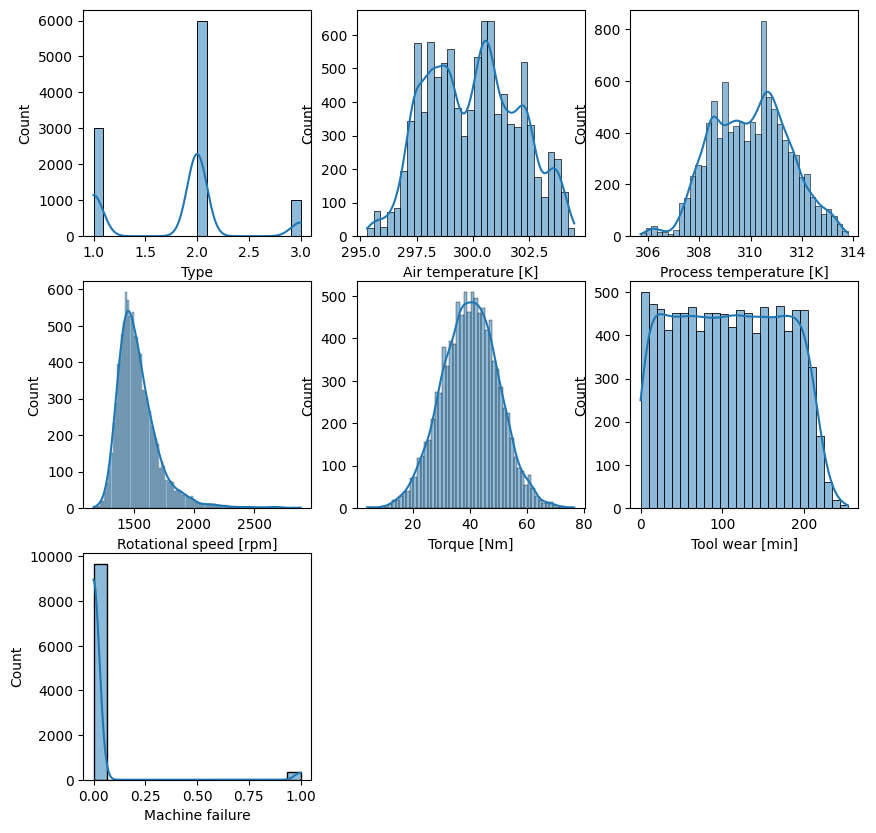

In [23]:
plt.figure(figsize=(10,10))
for i,col in enumerate(data.columns,1):
    plt.subplot(3,3,i)
    sns.histplot(data[col],kde=True)

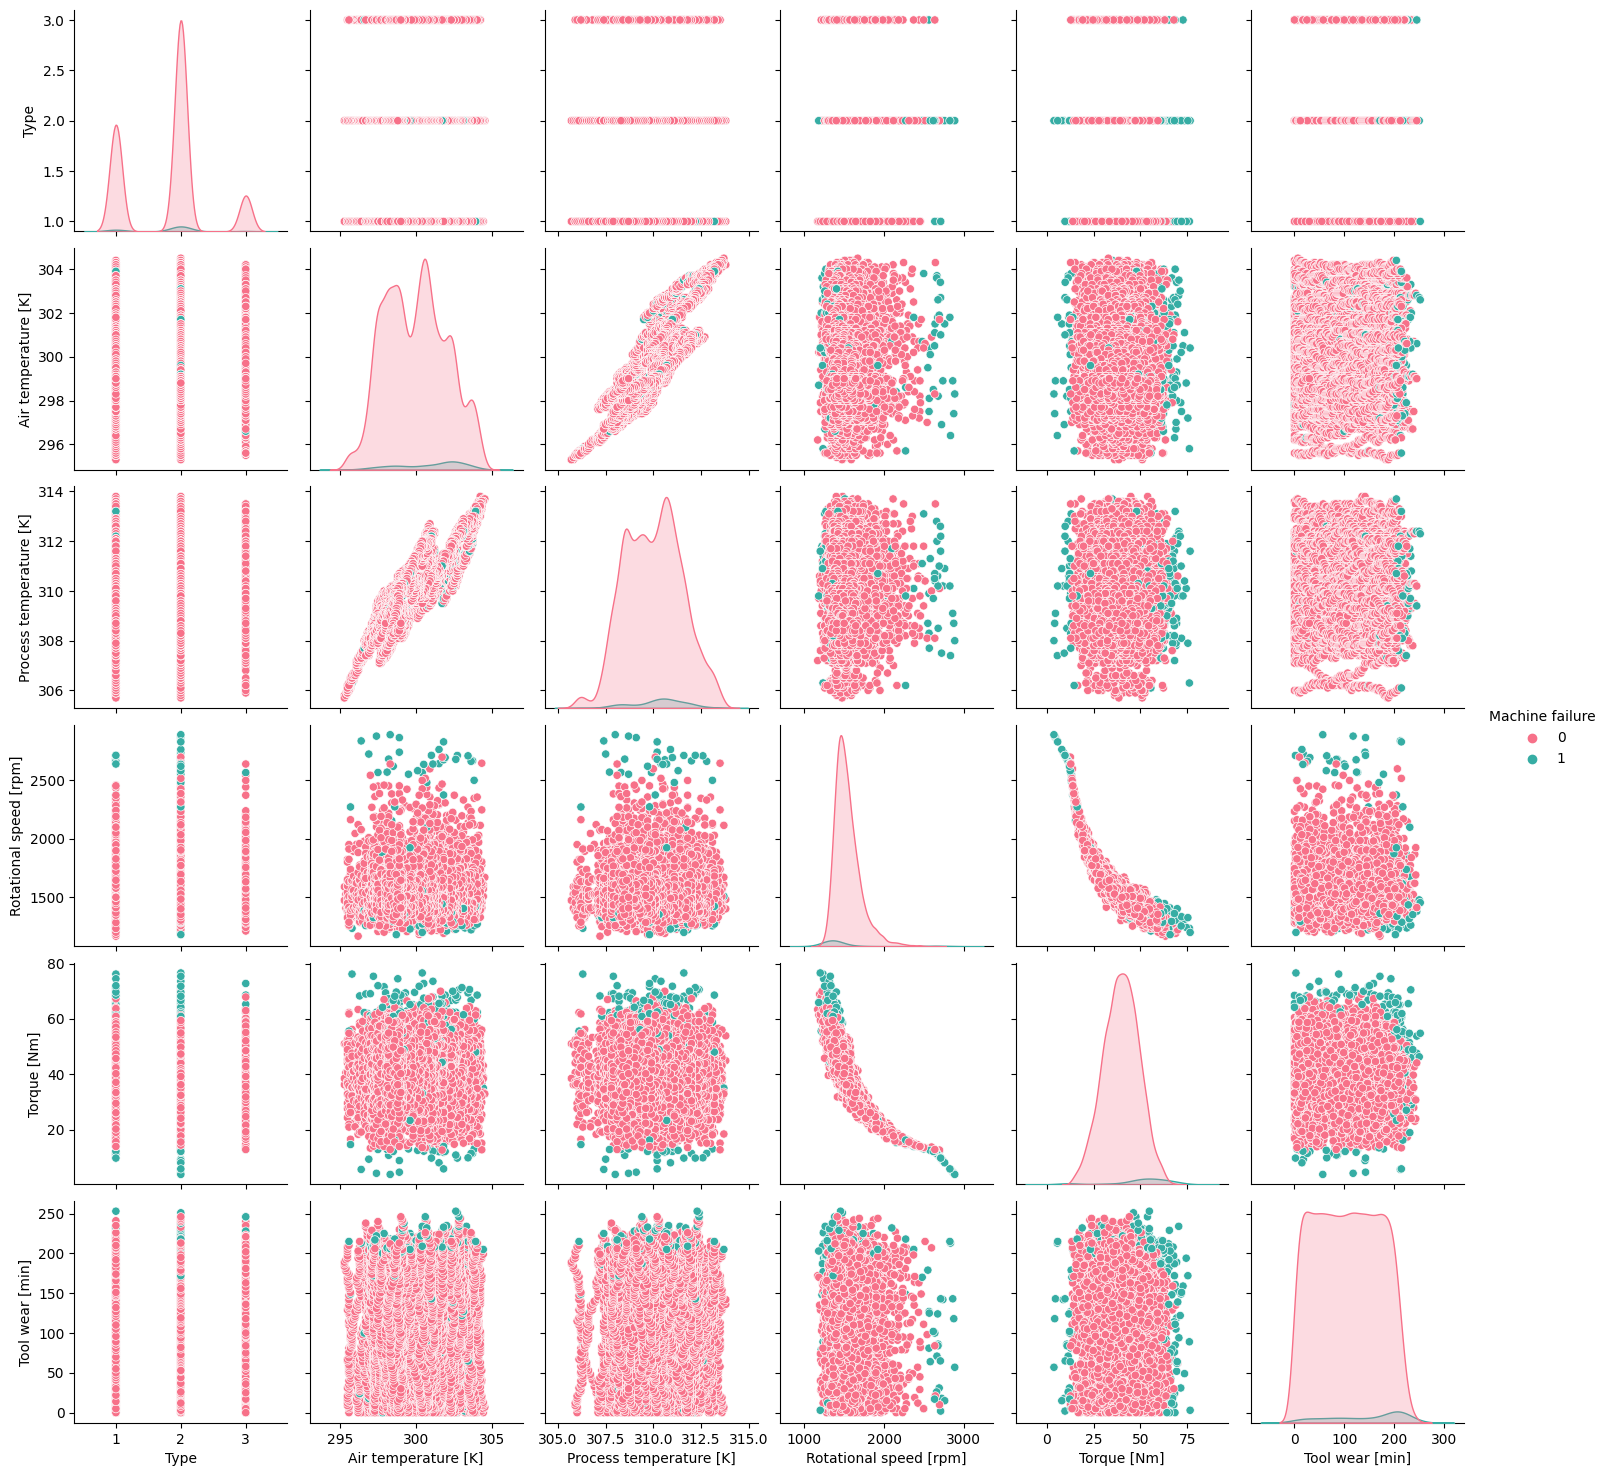

In [24]:
sns.pairplot(data, hue='Machine failure', palette='husl')

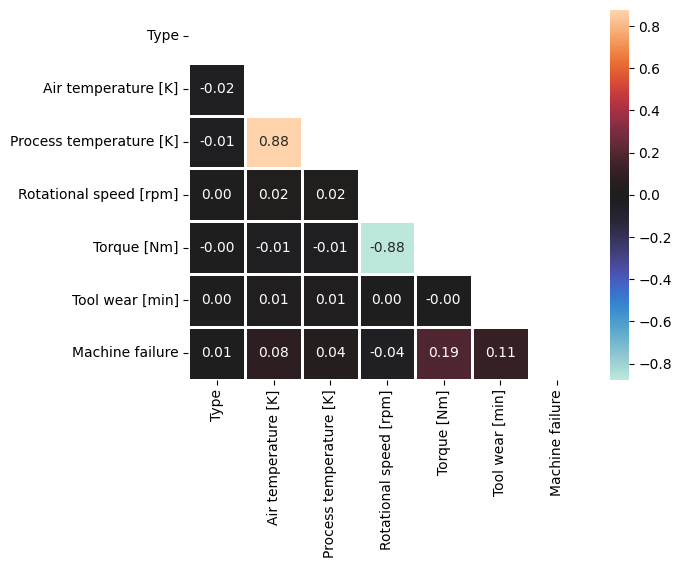

In [25]:
# Create the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle 
mask = np.triu(np.ones_like(corr, dtype=bool))

# Add the mask to the heatmap
sns.heatmap(corr, mask=np.triu(np.ones_like(corr, dtype=bool))
, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()


## Removing highly correlated features

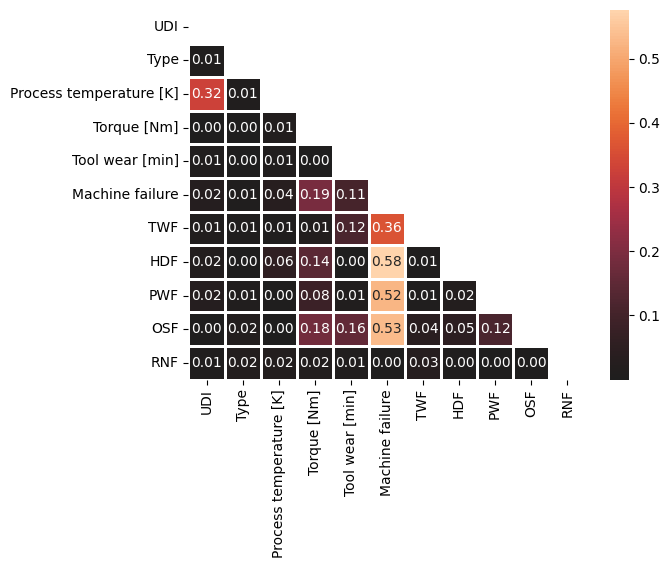

In [11]:
# Calculate the correlation matrix and take the absolute value
corr_df = data.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_df, dtype=bool))
tri_df = corr_df.mask(mask)

# List column names of highly correlated features (r > 0.95)
to_drop = [c for c in tri_df.columns if any(tri_df[c] >  0.80)]

# Drop the features in the to_drop list
reduced_df = data.drop(to_drop, axis='columns')

# Create the correlation matrix
reduced_corr = reduced_df.corr().abs()

# Generate a mask for the upper triangle 
mask = np.triu(np.ones_like(reduced_corr, dtype=bool))

# Add the mask to the heatmap
sns.heatmap(reduced_corr, mask=np.triu(np.ones_like(reduced_corr, dtype=bool))
, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

In [12]:
data.describe()

,UDI,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,1.80060,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,0.60023,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,1.00000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,2.00000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,2.00000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,3.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


## Feature Selection

In [44]:
X=data.loc[:,data.columns!='Machine failure'].values
y=data.loc[:,'Machine failure'].values

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [46]:
scaler= StandardScaler()
X=scaler.fit_transform(X)

## Training and Validation

In [47]:
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.25,random_state=42)

## Structure of a Neural Network

In [48]:
from keras.models import Sequential
from keras.layers import Dense

In [49]:
model = Sequential([

    Dense(6, activation ='relu', input_shape =(6,)),
 
    Dense(5, activation ='relu'),
    Dense(4, activation ='relu'),
 
    Dense(1, activation ='sigmoid')
])

In [50]:
model.output_shape
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 6)                 42        
                                                                 
 dense_5 (Dense)             (None, 5)                 35        
                                                                 
 dense_6 (Dense)             (None, 4)                 24        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 106
Trainable params: 106
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.compile(loss ='binary_crossentropy',optimizer ='adam', metrics =['accuracy'])

In [53]:
history=model.fit(X_train, y_train, validation_split=0.2, epochs = 100, batch_size = 32, verbose = 1)

Epoch 1/100
188/188 [==============================] - 1s 2ms/step - loss: 0.0516 - accuracy: 0.9813 - val_loss: 0.0794 - val_accuracy: 0.9760
Epoch 2/100
188/188 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9812 - val_loss: 0.0770 - val_accuracy: 0.9747
Epoch 3/100
188/188 [==============================] - 0s 2ms/step - loss: 0.0513 - accuracy: 0.9808 - val_loss: 0.0778 - val_accuracy: 0.9747
Epoch 4/100
188/188 [==============================] - 0s 2ms/step - loss: 0.0512 - accuracy: 0.9825 - val_loss: 0.0780 - val_accuracy: 0.9760
Epoch 5/100
188/188 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9813 - val_loss: 0.0774 - val_accuracy: 0.9753
Epoch 6/100
188/188 [==============================] - 0s 2ms/step - loss: 0.0516 - accuracy: 0.9813 - val_loss: 0.0776 - val_accuracy: 0.9760
Epoch 7/100
188/188 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9823 - val_loss: 0.0766 - val_accuracy: 0.9753

In [54]:
y_pred = model.predict(X_test)
print(y_pred)

79/79 [==============================] - 0s 1ms/step
[[0.01981049]
 [0.02179781]
 [0.00045149]
 ...
 [0.0050201 ]
 [0.00253336]
 [0.01046368]]
